<a href="https://colab.research.google.com/github/Meghacodess/Assignment/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing basic libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [ ]:
df=pd.read_csv("youth_tobacco.csv")
df.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

Upon examining the dataset using the df.info() method, we identified the presence of missing values in the following attributes:

Response,
Data_Value,
Data_Value_Footnote_Symbol,
Data_Value_Footnote,
Data_Value_Std_Err,
Low_Confidence_Limit,
High_Confidence_Limit,
Sample_Size,
GeoLocation

Before addressing missing values, I first want to check whether duplicate rows exist in the dataset. If duplicates are found, I will remove them to enhance data relevance.


In [ ]:
print("Before:", df.shape)

df = df.drop_duplicates()

print("After:", df.shape)
""

Before: (10600, 31)
After: (10600, 31)


''

 no duplicate rows were found

In [ ]:
for col in df.columns:
  print(f"Column: {col}")
  print(df[col].unique())
  print("-"*90)


Column: YEAR
[2004 2008 2015 2005 2009 2001 2007 2006 2002 2003 2011 2010 2000 2013
 2014 2016 2012 1999 2017]
------------------------------------------------------------------------------------------
Column: LocationAbbr
['OH' 'AL' 'WV' 'IL' 'CT' 'ID' 'VT' 'PA' 'LA' 'KY' 'UT' 'MN' 'DE' 'NH'
 'MA' 'AR' 'GA' 'IA' 'NC' 'WI' 'SC' 'MS' 'IN' 'ND' 'TN' 'NJ' 'HI' 'RI'
 'AZ' 'OK' 'KS' 'TX' 'CA' 'MD' 'MO' 'ME' 'NE' 'FL' 'NY' 'VA' 'CO' 'SD'
 'MI' 'WY' 'NM' 'DC' 'VI' 'GU' 'US' 'PR']
------------------------------------------------------------------------------------------
Column: LocationDesc
['Ohio' 'Alabama' 'West Virginia' 'Illinois' 'Connecticut' 'Idaho'
 'Vermont' 'Pennsylvania' 'Louisiana' 'Kentucky' 'Utah' 'Minnesota'
 'Delaware' 'New Hampshire' 'Massachusetts' 'Arkansas' 'Georgia' 'Iowa'
 'North Carolina' 'Wisconsin' 'South Carolina' 'Mississippi' 'Indiana'
 'North Dakota' 'Tennessee' 'New Jersey' 'Hawaii' 'Rhode Island' 'Arizona'
 'Oklahoma' 'Kansas' 'Texas' 'California' 'Maryland' 'Mis

After analyzing the dataset, I have identified multiple attributes that are either empty or contain only a single unique value. Since these attributes do not contribute meaningful variability to the analysis, I will remove them to enhance data relevance and efficiency.


In [ ]:
df = df.loc[:, df.nunique() > 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   10600 non-null  int64  
 1   LocationAbbr           10600 non-null  object 
 2   LocationDesc           10600 non-null  object 
 3   TopicDesc              10600 non-null  object 
 4   MeasureDesc            10600 non-null  object 
 5   DataSource             10600 non-null  object 
 6   Response               8190 non-null   object 
 7   Data_Value             10080 non-null  float64
 8   Data_Value_Std_Err     10080 non-null  float64
 9   Low_Confidence_Limit   10083 non-null  float64
 10  High_Confidence_Limit  10080 non-null  float64
 11  Sample_Size            10080 non-null  float64
 12  Gender                 10600 non-null  object 
 13  Education              10600 non-null  object 
 14  GeoLocation            10596 non-null  object 
 15  To

I used df.loc[:, df.nunique() > 1] to remove all attributes that contained only a single unique value or consisted entirely of NaN values, as these attributes do not contribute meaningful insights for analysis.

Since LocationAbbr and LocationDesc contain similar information, I will retain LocationAbbr as it provides a more concise representation, making analysis more efficient. Similarly, StratificationID1 maps directly to Gender, and StratificationID4 maps to Education, making the stratification columns redundant. Therefore, I will drop them to avoid unnecessary duplication and streamline the dataset.


# New Section

In [ ]:
cols_to_drop = ['LocationDesc', 'StratificationID1', 'StratificationID4']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], axis=1)


In [ ]:
for col in df.columns:
  print(f"Column: {col}")
  print(df[col].unique())
  print("-"*90)

Column: YEAR
[2004 2008 2015 2005 2009 2001 2007 2006 2002 2003 2011 2010 2000 2013
 2014 2016 2012 1999 2017]
------------------------------------------------------------------------------------------
Column: LocationAbbr
['OH' 'AL' 'WV' 'IL' 'CT' 'ID' 'VT' 'PA' 'LA' 'KY' 'UT' 'MN' 'DE' 'NH'
 'MA' 'AR' 'GA' 'IA' 'NC' 'WI' 'SC' 'MS' 'IN' 'ND' 'TN' 'NJ' 'HI' 'RI'
 'AZ' 'OK' 'KS' 'TX' 'CA' 'MD' 'MO' 'ME' 'NE' 'FL' 'NY' 'VA' 'CO' 'SD'
 'MI' 'WY' 'NM' 'DC' 'VI' 'GU' 'US' 'PR']
------------------------------------------------------------------------------------------
Column: TopicDesc
['Cigarette Use (Youth)' 'Smokeless Tobacco Use (Youth)'
 'Cessation (Youth)']
------------------------------------------------------------------------------------------
Column: MeasureDesc
['Smoking Status' 'User Status'
 'Quit Attempt in Past Year Among Current Cigarette Smokers'
 'Percent of Current Smokers Who Want to Quit']
----------------------------------------------------------------------------------

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   10600 non-null  int64  
 1   LocationAbbr           10600 non-null  object 
 2   TopicDesc              10600 non-null  object 
 3   MeasureDesc            10600 non-null  object 
 4   DataSource             10600 non-null  object 
 5   Response               8190 non-null   object 
 6   Data_Value             10080 non-null  float64
 7   Data_Value_Std_Err     10080 non-null  float64
 8   Low_Confidence_Limit   10083 non-null  float64
 9   High_Confidence_Limit  10080 non-null  float64
 10  Sample_Size            10080 non-null  float64
 11  Gender                 10600 non-null  object 
 12  Education              10600 non-null  object 
 13  GeoLocation            10596 non-null  object 
 14  TopicId                10600 non-null  object 
 15  Me

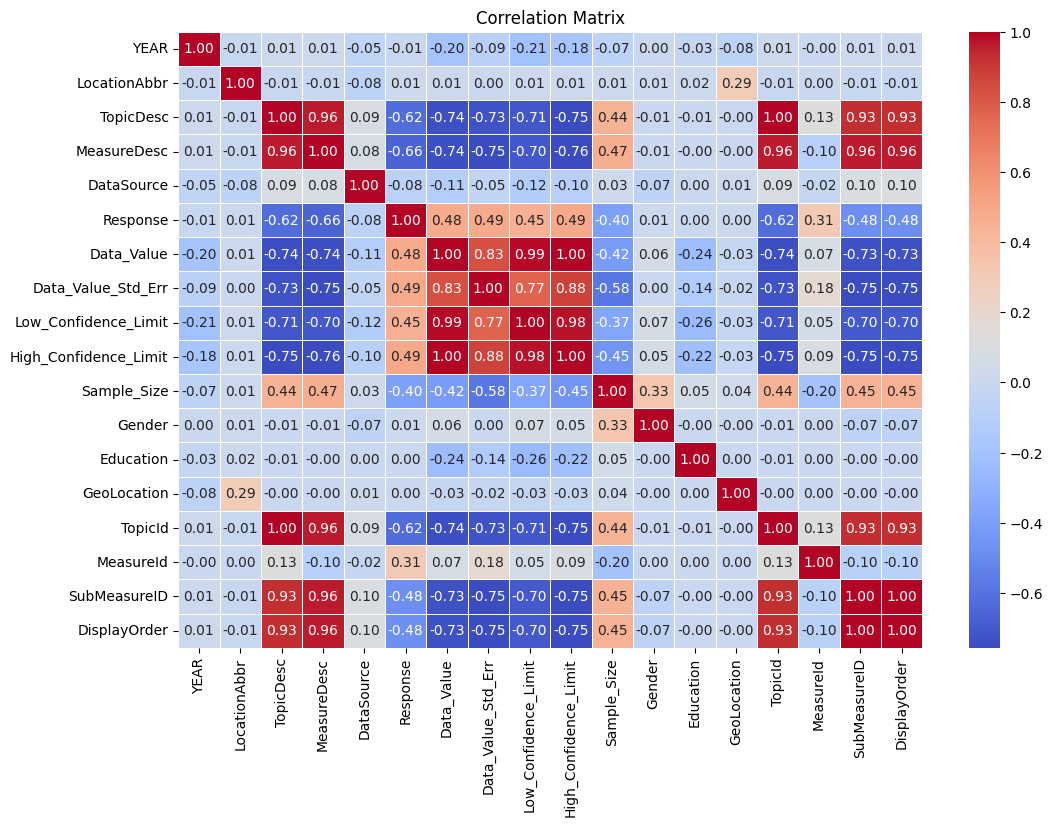

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical columns using label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Set correlation threshold
correlation_threshold = 0.85

# Find highly correlated features
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:  # Check absolute correlation
            colname = corr_matrix.columns[i]  # Get column name
            high_corr_features.add(colname)

# Drop the identified highly correlated columns
df.drop(columns=high_corr_features, inplace=True)

print(f"Dropped columns due to high correlation: {high_corr_features}")
print("Updated dataframe shape:", df.shape)


Dropped columns due to high correlation: {'DisplayOrder', 'Low_Confidence_Limit', 'SubMeasureID', 'TopicId', 'MeasureDesc', 'High_Confidence_Limit'}
Updated dataframe shape: (10600, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                10600 non-null  int64  
 1   LocationAbbr        10600 non-null  int64  
 2   TopicDesc           10600 non-null  int64  
 3   DataSource          10600 non-null  int64  
 4   Response            10600 non-null  int64  
 5   Data_Value          10080 non-null  float64
 6   Data_Value_Std_Err  10080 non-null  float64
 7   Sample_Size         10080 non-null  float64
 8   Gender              10600 non-null  int64  
 9   Education           10600 non-null  int64  
 10  GeoLocation         10600 non-null  int64  
 11  MeasureId           10600 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 993.9 KB


Now that we have refined our dataset, the scope of our data cleaning process has significantly reduced. The only attributes with missing values are Data_Value, Data_Value_Std_Err, and Sample_Size. Our focus will now be on handling these specific attributes to ensure data completeness and reliability.

A detailed analysis of each attribute helps identify and address outliers, preserving data integrity and enhancing model performance.
It’s better to treat outliers first and then fill missing values using the median from the cleaned data. This way, your imputation is based on a more reliable central tendency.

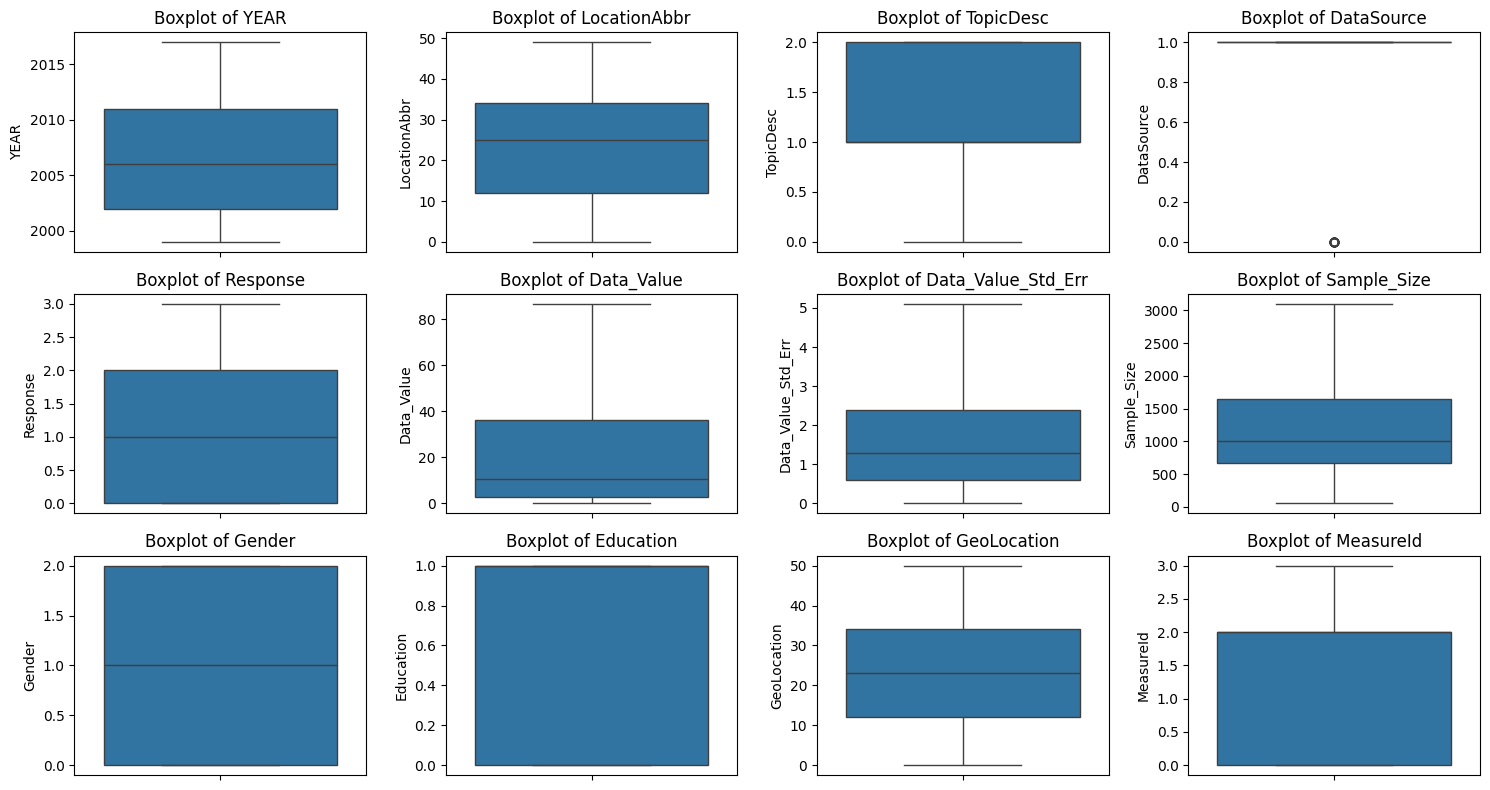

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Adjust rows & columns as needed
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


we can see that year column has no outlier and is normally distributed.


In [ ]:
# Define the columns to process
columns_to_clip = ['Data_Value', 'Data_Value_Std_Err', 'Sample_Size']

# Compute Q1, Q3, and IQR
Q1 = df[columns_to_clip].quantile(0.25)
Q3 = df[columns_to_clip].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip outliers to the lower and upper bounds
df[columns_to_clip] = df[columns_to_clip].apply(lambda x: x.clip(lower_bound[x.name], upper_bound[x.name]))

print("Outliers successfully clipped for selected columns.")





Outliers successfully clipped for selected columns.


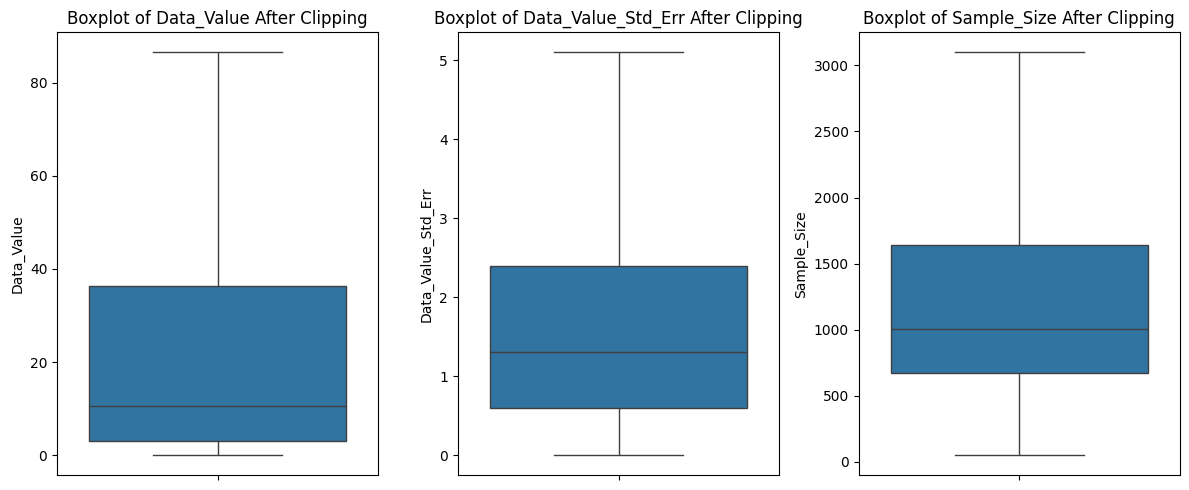

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

for i, col in enumerate(['Data_Value', 'Data_Value_Std_Err', 'Sample_Size'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} After Clipping")

plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                10600 non-null  int64  
 1   LocationAbbr        10600 non-null  int64  
 2   TopicDesc           10600 non-null  int64  
 3   DataSource          10600 non-null  int64  
 4   Response            10600 non-null  int64  
 5   Data_Value          10080 non-null  float64
 6   Data_Value_Std_Err  10080 non-null  float64
 7   Sample_Size         10080 non-null  float64
 8   Gender              10600 non-null  int64  
 9   Education           10600 non-null  int64  
 10  GeoLocation         10600 non-null  int64  
 11  MeasureId           10600 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 993.9 KB


Now replacing missing values with median, as median is robust to outlier

In [ ]:
df['Data_Value'].fillna(df['Data_Value'].median(), inplace=True)
df['Data_Value_Std_Err'].fillna(df['Data_Value_Std_Err'].median(), inplace=True)
df['Sample_Size'].fillna(df['Sample_Size'].median(), inplace=True)

<ipython-input-24-6ac875d1e9d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Data_Value'].fillna(df['Data_Value'].median(), inplace=True)
<ipython-input-24-6ac875d1e9d3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                10600 non-null  int64  
 1   LocationAbbr        10600 non-null  int64  
 2   TopicDesc           10600 non-null  int64  
 3   DataSource          10600 non-null  int64  
 4   Response            10600 non-null  int64  
 5   Data_Value          10600 non-null  float64
 6   Data_Value_Std_Err  10600 non-null  float64
 7   Sample_Size         10600 non-null  float64
 8   Gender              10600 non-null  int64  
 9   Education           10600 non-null  int64  
 10  GeoLocation         10600 non-null  int64  
 11  MeasureId           10600 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 993.9 KB


Now my data is fully cleaned...


BASIC SUMMARY STATISTICS

In [ ]:
df.describe()

,YEAR,LocationAbbr,TopicDesc,DataSource,Response,Data_Value,Data_Value_Std_Err,Sample_Size,Gender,Education,GeoLocation,MeasureId
count,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.0000
mean,2007.053491,23.454340,1.157830,0.996792,1.454717,19.850781,1.721774,1199.859575,1.003208,0.531415,24.158113,1.2400
std,5.462656,13.918569,0.766611,0.056547,1.103574,20.729889,1.433871,822.510928,0.817183,0.499036,13.869341,1.0953
min,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.0000
25%,2002.000000,12.000000,1.000000,1.000000,0.000000,3.200000,0.600000,683.000000,0.000000,0.000000,12.000000,0.0000
50%,2006.000000,25.000000,1.000000,1.000000,1.000000,10.550000,1.300000,1001.000000,1.000000,1.000000,23.000000,2.0000
75%,2011.000000,34.000000,2.000000,1.000000,2.000000,33.925000,2.300000,1607.000000,2.000000,1.000000,34.000000,2.0000
max,2017.000000,49.000000,2.000000,1.000000,3.000000,86.562500,5.100000,3098.500000,2.000000,1.000000,50.000000,3.0000


<ipython-input-30-5d99bed80b0f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['YEAR'], y=df['Data_Value'], ci=None, marker="o")


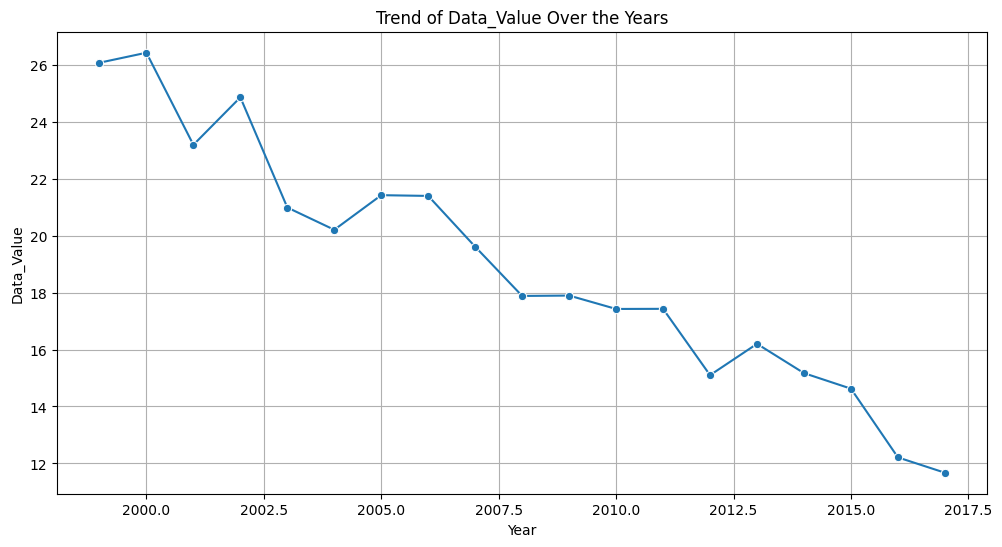

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['YEAR'], y=df['Data_Value'], ci=None, marker="o")
plt.title("Trend of Data_Value Over the Years")
plt.xlabel("Year")
plt.ylabel("Data_Value")
plt.grid(True)
plt.show()

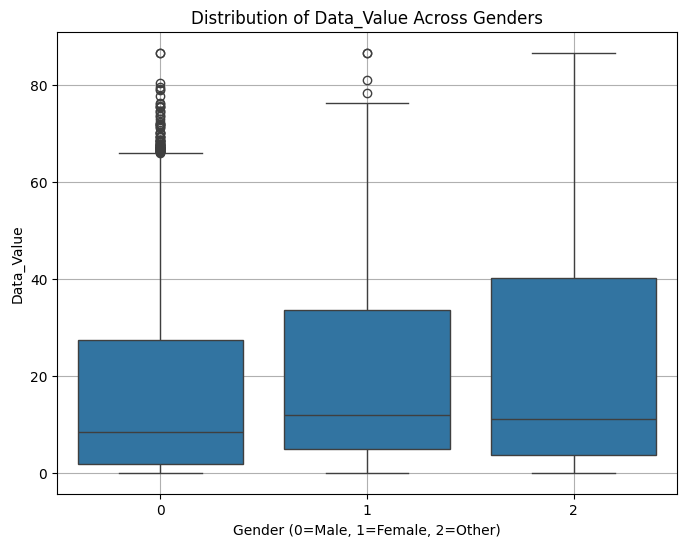

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Gender'], y=df['Data_Value'])
plt.title("Distribution of Data_Value Across Genders")
plt.xlabel("Gender (0=Male, 1=Female, 2=Other)")
plt.ylabel("Data_Value")
plt.grid(True)
plt.show()

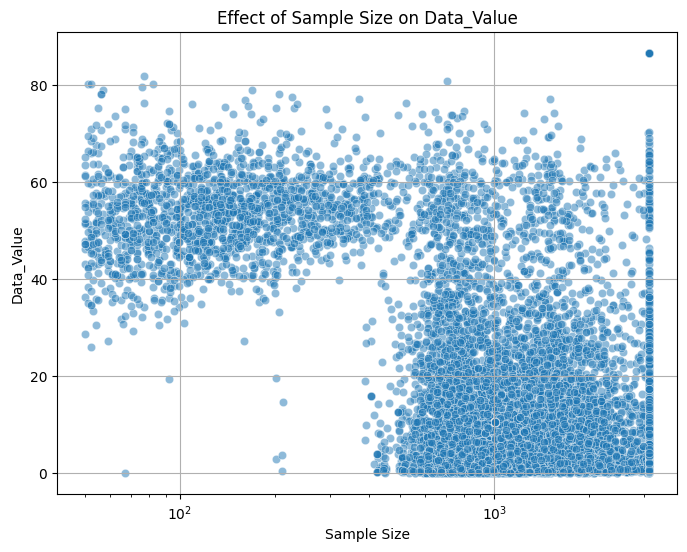

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Sample_Size'], y=df['Data_Value'], alpha=0.5)
plt.title("Effect of Sample Size on Data_Value")
plt.xlabel("Sample Size")
plt.ylabel("Data_Value")
plt.xscale("log")  # Log scale to handle large variations
plt.grid(True)
plt.show()

<ipython-input-34-fc0c513e550d>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['Data_Value'], estimator=np.mean, ci=None)
<ipython-input-34-fc0c513e550d>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['Data_Value'], estimator=np.mean, ci=None)
<ipython-input-34-fc0c513e550d>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[col], y=df['Data_Value'], estimator=np.mean, ci=None)


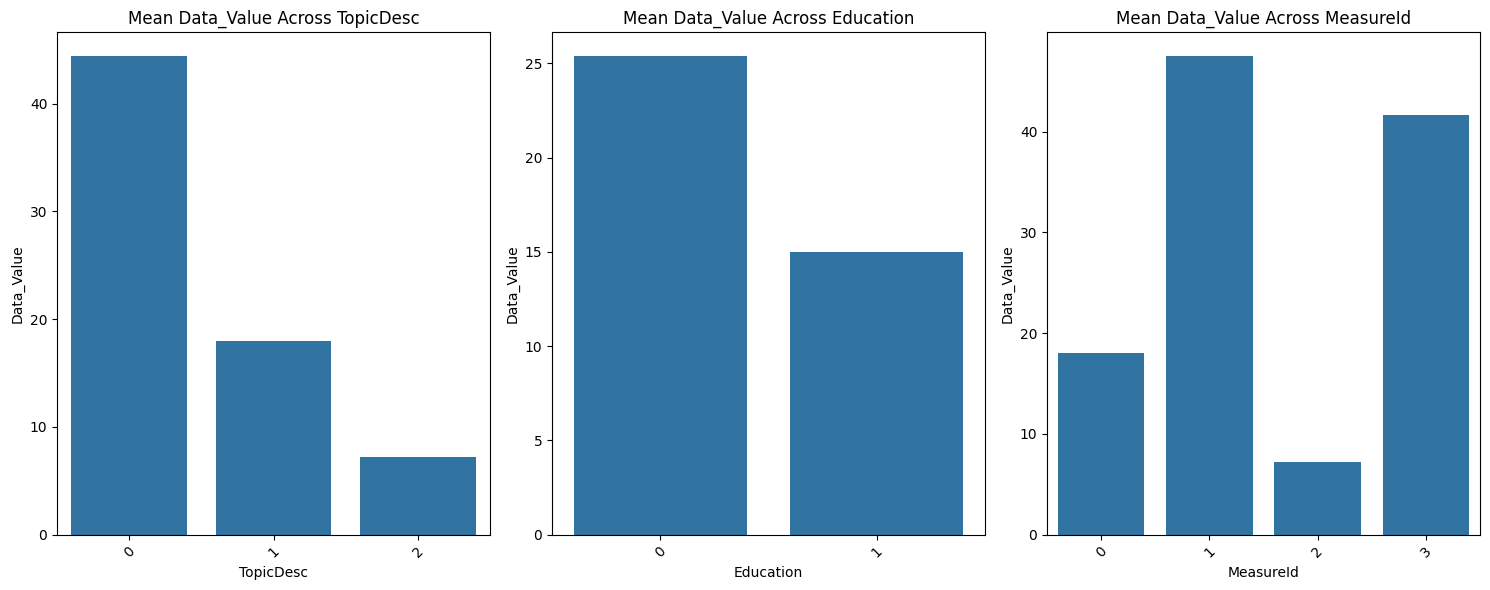

In [ ]:
categorical_features = ['TopicDesc', 'Education', 'MeasureId']
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=df[col], y=df['Data_Value'], estimator=np.mean, ci=None)
    plt.title(f"Mean Data_Value Across {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

df['Z_Score'] = zscore(df['Data_Value'])
outliers = df[df['Z_Score'].abs() > 3]  # Anything beyond 3 std deviations

print(f"Total Outliers: {len(outliers)}")
display(outliers[['YEAR', 'Data_Value', 'Sample_Size']])

Total Outliers: 6


,YEAR,Data_Value,Sample_Size
463,2002,86.5625,3098.5
934,2002,86.5625,3098.5
1494,2002,86.5625,3098.5
3252,2002,86.5625,3098.5
8104,2002,86.5625,3098.5
10412,2002,86.5625,3098.5


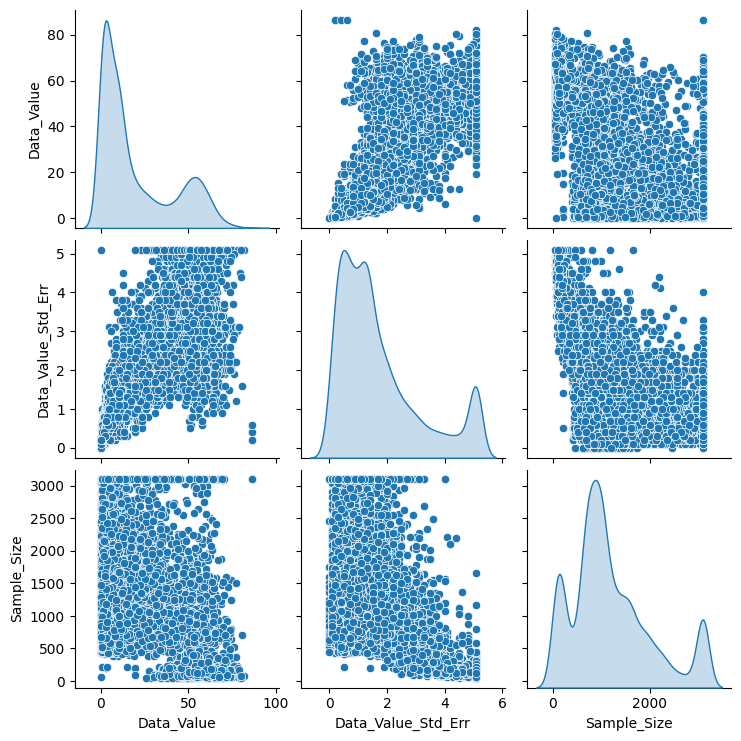

In [ ]:
sns.pairplot(df[['Data_Value', 'Data_Value_Std_Err', 'Sample_Size']], diag_kind='kde')
plt.show()